# TensorFlow MNIST  Demo


Train a basic neural net on MNIST Data. 

For more info see [medium](https://medium.com/data-science-365/acquire-understand-and-prepare-the-mnist-dataset-3d71a84e07e7) or this [article](https://medium.com/@koushikkushal95/mnist-hand-written-digit-classification-using-neural-network-from-scratch-54da85712a06)

# Loading MNIST training data

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# import MNIST data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:  

In [2]:
# check MNIST training images matrix shape
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [3]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [4]:
set(train_labels)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [5]:
# check MNIST training images matrix shape
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [6]:
len(test_labels)

10000

## Process the data

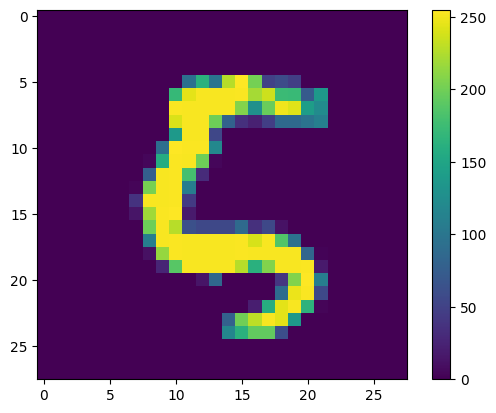

In [8]:
plt.figure()
plt.imshow(train_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

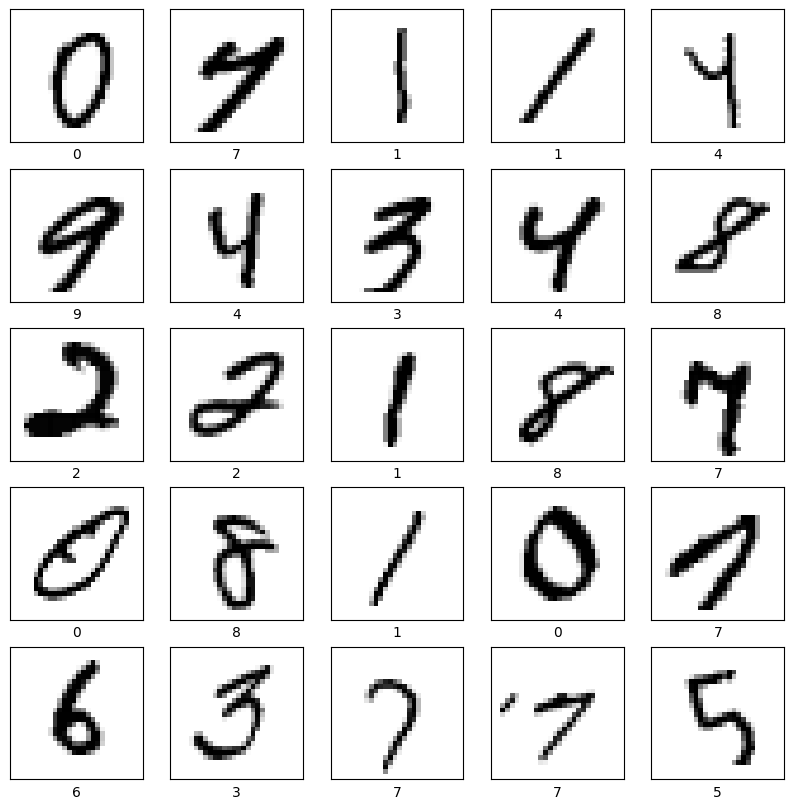

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+1000], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i+1000])
plt.show()

## Build the model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='gelu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## train the model 

### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [14]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.05)

Epoch 1/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.8643 - loss: 0.4848 - val_accuracy: 0.9643 - val_loss: 0.1418
Epoch 2/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.9518 - loss: 0.1677 - val_accuracy: 0.9707 - val_loss: 0.1084
Epoch 3/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.9660 - loss: 0.1145 - val_accuracy: 0.9660 - val_loss: 0.1046
Epoch 4/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.9731 - loss: 0.0902 - val_accuracy: 0.9740 - val_loss: 0.0872
Epoch 5/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.9796 - loss: 0.0687 - val_accuracy: 0.9773 - val_loss: 0.0861
Epoch 6/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.9828 - loss: 0.0557 - val_accuracy: 0.9763 - val_loss: 0.0824
Epoch 7/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.9868 - loss: 0.0441 - val_accuracy: 0.9787 - val_loss: 0.0854
Epoch 8/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.9879 -

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 301us/step - accuracy: 0.9757 - loss: 0.0912

Test accuracy: 0.9757000207901001


### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [21]:
predictions[0]

array([1.7701571e-09, 1.1317639e-10, 1.7028965e-08, 2.9031035e-05,
       7.1664727e-14, 1.6453764e-09, 8.6369998e-14, 9.9996883e-01,
       2.4075362e-08, 2.0794084e-06], dtype=float32)

In [22]:
np.argmax(predictions[0])

7

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

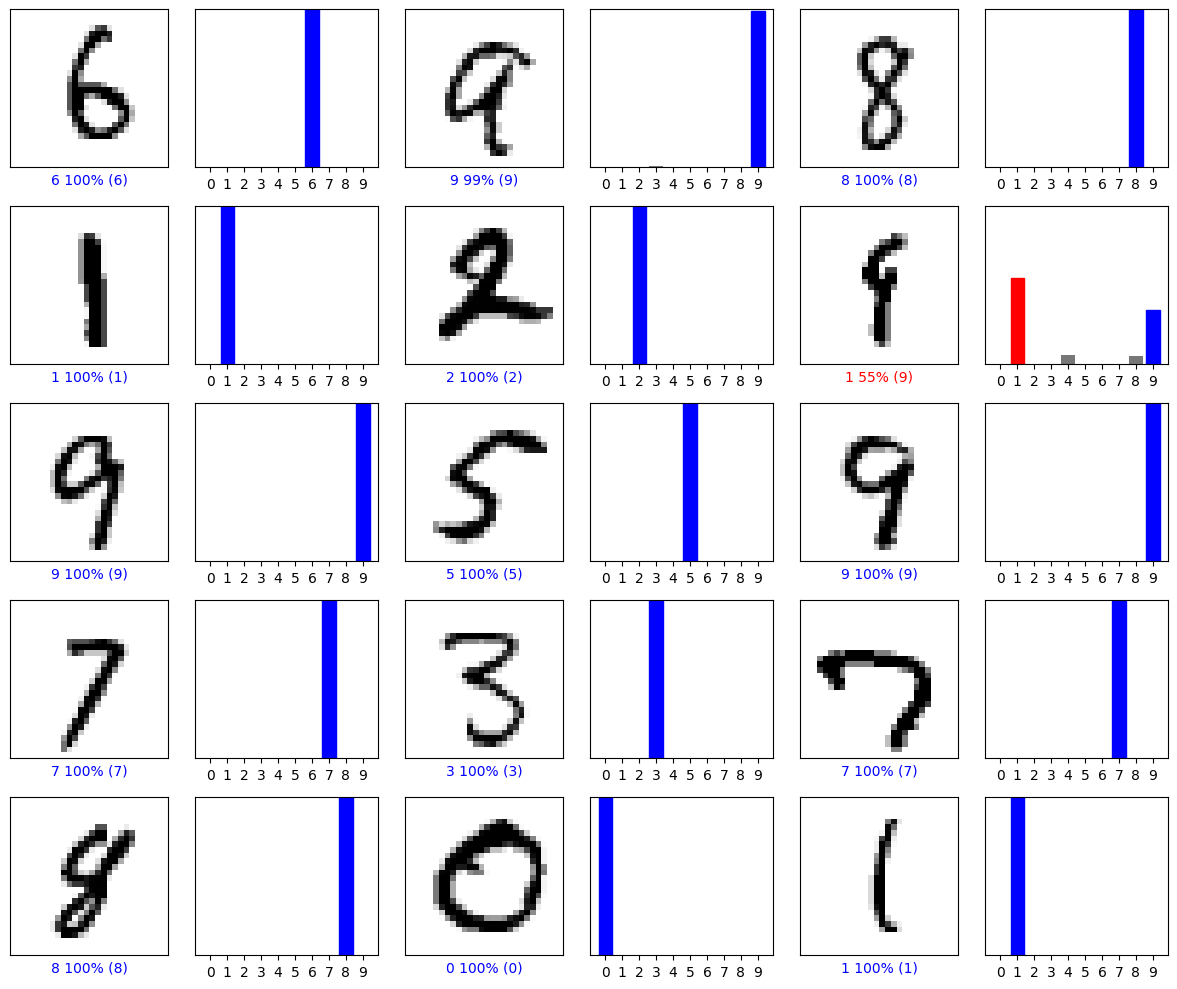

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
offset = 3000
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+offset, predictions[i+offset], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()